# Federal Bank Statement Analysis
The aim of this notebook is to model topics from the documents provided by the federal banks to the public of the following countries:

* Chile
* South Africa
* India

In [2]:
library(tictoc)
library(tidyverse)
library(tidytext)
library(topicmodels)
library(plotly)
library(tm)

In [41]:
mpc_extract <- read.csv("./text_data/mpc_text_extract.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on './text_data/mpc_text_extract.csv'”

In [42]:
print(mpc_extract)

  bank
1 SARB
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [10]:
set.seed(1234)

In [43]:
# OWN_STOP_WORDS = c()

In [45]:
str(diamonds)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


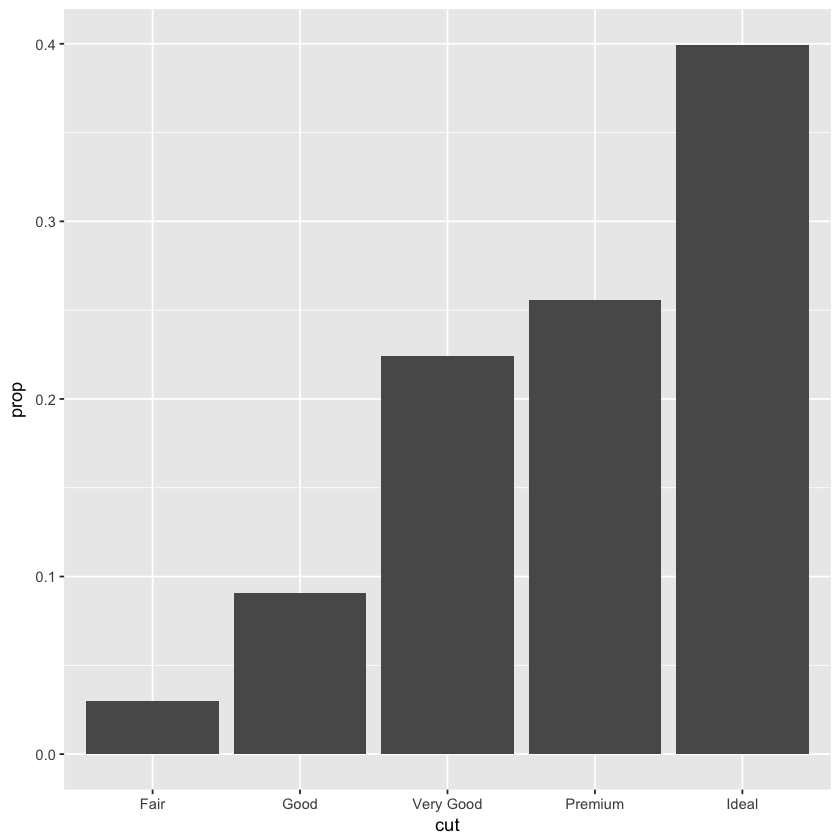

In [46]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = ..prop.., group = 1))

In [49]:
?dplyr::rename

In [55]:
mpc_extract_17 <- read_csv("./data/text_extract/2017/mpc_text_extract_17.csv")
mpc_extract_17
mpc_extract_18 <- read_csv("./data/text_extract/2018/mpc_text_extract_18.csv")
mpc_extract_18
mpc_extract <- bind_rows(mpc_extract_17, mpc_extract_18)
print(mpc_extract)

Parsed with column specification:
cols(
  bank = col_character(),
  month = col_integer(),
  date = col_character(),
  mpc_communication = col_character()
)
Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 is invalid in this locale”Warning message in FUN(X[[i]], ...):
“input string 4 

Warning message in grepl("<html.*>", data[["text/html"]], ignore.case = TRUE):
“input string 1 is invalid in this locale”

bank,month,date,mpc_communication


Parsed with column specification:
cols(
  bank = col_character(),
  month = col_integer(),
  date = col_character(),
  mpc_communication = col_character()
)


bank,month,date,mpc_communication


Warning message in grepl("^[^[:blank:][:cntrl:]\"](?:|[^[:cntrl:]\"]*[^[:blank:][:cntrl:]\"])$", :
“input string 1 is invalid UTF-8”Warning message in grepl("^[^[:blank:][:cntrl:]\"](?:|[^[:cntrl:]\"]*[^[:blank:][:cntrl:]\"])$", :
“input string 2 is invalid UTF-8”Warning message in grepl("^[^[:blank:][:cntrl:]\"](?:|[^[:cntrl:]\"]*[^[:blank:][:cntrl:]\"])$", :
“input string 3 is invalid UTF-8”Warning message in grepl("^[^[:blank:][:cntrl:]\"](?:|[^[:cntrl:]\"]*[^[:blank:][:cntrl:]\"])$", :
“input string 4 is invalid UTF-8”Warning message in grepl("^[^[:blank:][:cntrl:]\"](?:|[^[:cntrl:]\"]*[^[:blank:][:cntrl:]\"])$", :
“input string 5 is invalid UTF-8”

# A tibble: 7 x 4
  bank  month date      mpc_communication                                      
  <chr> <int> <chr>     <chr>                                                  
1 SARB      1 24-Jan-17 "Issued by Lesetja Kganyago, Governor of the Since the…
2 SARB      3 30-Mar-17 "Issued by Lesetja Kganyago, Governor of the  Since th…
3 SARB      5 25-May-17 "Issued by Lesetja Kganyago, Governor of the  Headline…
4 SARB      7 20-Jul-17 "Issued by Lesetja Kganyago, Governor of the  Since th…
5 SARB      9 21-Sep-17 "Issued by Lesetja Kganyago, Governor of the  The Sout…
6 SARB     11 23-Nov-17 "Issued by Lesetja Kganyago, Governor of the  Since th…
7 SARB      1 18-Jan-18 In recent weeks some of the risks to the inflation out…
